# Introduccion al dataset
El dataset que vamos a analizar es un csv de albumes de musica generado sinteticamente, es decir todos los datos presentados en este dataset son ficticios.
Este dataset fue descargado de kaggle: https://www.kaggle.com/datasets/revilrosa/music-label-dataset

# Contenidos

**id ---> identificador del album**
**artist_id ---> identificador del artista**
**album_title ---> titulo del album**
**genre ---> genero del album, un artista puede sacar álbumes con distintos géneros**
**year_of_pub ---> año en el que se publicó el album**
**num_of_tracks ---> cantidad de pistas que tiene el album**
**num_of_sales ---> cantidad de ventas que consiguió el album en el primer mes de lanzamiento**
**rolling_stone_critic ---> rating que la revista rolling stone le dio al album**
**mtv_critic ---> rating que mtv le dio al album**
**music_mania_critic ---> rating que music mania le dio al album**

# Objetivo
El objetivo de este trabajo es analizar en profundidad el dataset y obtener todos los datos e insights que sean posibles, analizar variables de interés y también realizar un modelo de regresión. Yo en mi caso decidí hacer un modelo de regresión logística que pueda predecir si el rating de un album va a ser malo, mediocre, bueno o muy bueno dependiendo de determinadas variables.

En este caso la variable independiente serán las columnas de 'tracks', 'sales' y 'Exito' las cuales se utilizaran para determinar la variable dependiente la cual será el Rating
Para poder construir este modelo y analizar en profundidad el dataset, se realizaran diversos cambios como por ejemplo, escalados, encoding de variables categóricas y creación de nuevas columnas, entre otras cosas.
La "hipotesis" que el modelo tratara de resolver sera si realmente las variables predictoras pueden predecir que tan exitoso en termino de criticas son los albums

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
import sys, os
os.chdir(sys.path[0])

In [2]:
%load_ext autoreload
%autoreload 2

Importo las librerias que considere necesarias para realizar el analisis exploratorio, las visualizaciones del dataset y el modelo.(si es necesario puedo importar otras, más adelante)

## Informacion general del dataset e insights

In [3]:
albums = pd.read_csv('D:\pycharm\pythonProject\/UCEMA_personal\TP final\data/albums.csv')
albums

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010,8,151111,4.5,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016,3,871655,2.5,1.5,1.0
99996,99997,16345,Global,Retro,2013,14,146202,5.0,2.5,1.0
99997,99998,32674,MINI,Indie,2018,4,620452,2.0,4.0,5.0
99998,99999,10134,Marketing Belligerent Toe,Pop,2007,7,643276,4.0,1.5,4.0


Cargo el csv, por lo que se puede observar este dataset cuenta con 10 columnas y 10.000 filas

In [4]:
albums.duplicated().sum()

0

Este dataset no tiene nigun duplicado, como no hay no realizo ningún procedimiento

In [5]:
albums.isna().sum().sum()

0

Me fijo si hay algun faltante dentro del dataset, como no hay, no es necesario relaizar ningun procedimiento.

In [6]:
print(albums.describe())

                  id      artist_id    year_of_pub  num_of_tracks  \
count  100000.000000  100000.000000  100000.000000   100000.00000   
mean    50000.500000   24981.782050    2009.520960        8.48950   
std     28867.657797   14450.407866       5.776074        4.04511   
min         1.000000       1.000000    2000.000000        2.00000   
25%     25000.750000   12388.000000    2004.000000        5.00000   
50%     50000.500000   24940.500000    2010.000000        8.00000   
75%     75000.250000   37498.250000    2015.000000       12.00000   
max    100000.000000   50000.000000    2019.000000       15.00000   

       num_of_sales  rolling_stone_critic     mtv_critic  music_maniac_critic  
count  100000.00000         100000.000000  100000.000000        100000.000000  
mean   500044.72656              2.748945       2.751780             2.748225  
std    288033.73321              1.435789       1.437516             1.434577  
min      1009.00000              0.500000       0.500000  

Informacion general del dataset, al parecer el promedio de las 3 revistas de criticas son bastante similares

In [7]:
albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    100000 non-null  int64  
 1   artist_id             100000 non-null  int64  
 2   album_title           100000 non-null  object 
 3   genre                 100000 non-null  object 
 4   year_of_pub           100000 non-null  int64  
 5   num_of_tracks         100000 non-null  int64  
 6   num_of_sales          100000 non-null  int64  
 7   rolling_stone_critic  100000 non-null  float64
 8   mtv_critic            100000 non-null  float64
 9   music_maniac_critic   100000 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 7.6+ MB


In [8]:
numericas = albums.select_dtypes(exclude=['object']).columns
numericas

Index(['id', 'artist_id', 'year_of_pub', 'num_of_tracks', 'num_of_sales',
       'rolling_stone_critic', 'mtv_critic', 'music_maniac_critic'],
      dtype='object')

Me fijo el tipo de las columnas, este dataset cuenta con 11 columnas, 8 de tipo numerico (5 int y 3 float) y 2 de tipo categorico (object)

In [9]:
albums['year_of_pub'] = pd.to_datetime(albums['year_of_pub'], format = '%Y')
#albums['year_of_pub'] = albums['year_of_pub'].dt.year
albums

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006-01-01,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014-01-01,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000-01-01,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017-01-01,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010-01-01,8,151111,4.5,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016-01-01,3,871655,2.5,1.5,1.0
99996,99997,16345,Global,Retro,2013-01-01,14,146202,5.0,2.5,1.0
99997,99998,32674,MINI,Indie,2018-01-01,4,620452,2.0,4.0,5.0
99998,99999,10134,Marketing Belligerent Toe,Pop,2007-01-01,7,643276,4.0,1.5,4.0


Convierto el año de publicación a datetime para poder realizar el análisis y visualizarlo más adelante

In [10]:
artistas_unicos = albums['artist_id'].nunique()
generos = albums['genre'].nunique()
print('hay un total de ' + str(artistas_unicos) + ' artistas y ' + str(generos) + ' generos de musica')

hay un total de 43225 artistas y 38 generos de musica


Me fijo la cantidad de artistas unicos y generos de musica que hay en el dataset.

In [11]:
albums.rename(columns={'id': 'album_id', 'num_of_tracks': 'tracks', 'num_of_sales': 'sales'}, inplace=True)
albums

,album_id,artist_id,album_title,genre,year_of_pub,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006-01-01,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014-01-01,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000-01-01,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017-01-01,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010-01-01,8,151111,4.5,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016-01-01,3,871655,2.5,1.5,1.0
99996,99997,16345,Global,Retro,2013-01-01,14,146202,5.0,2.5,1.0
99997,99998,32674,MINI,Indie,2018-01-01,4,620452,2.0,4.0,5.0
99998,99999,10134,Marketing Belligerent Toe,Pop,2007-01-01,7,643276,4.0,1.5,4.0


Cambio algunos de los nombres de las columnas por otros mas convenientes para facilitar el trabajo

In [12]:
album_por_genero = albums.groupby('genre').count()
album_por_genero.rename(columns = {'album_id':'Cantidad_de_albums'}, inplace = True)
album_por_genero['Cantidad_de_albums']

genre
Alternative     1947
Ambient         1874
Black Metal     1860
Blues           1928
Boy Band        1894
Brit-Pop        1921
Compilation     2003
Country         1993
Dance           3775
Death Metal     1968
Deep House      1909
Electro-Pop     1855
Folk            1912
Gospel          2008
Hard Rock       1919
Heavy Metal     1953
Holy Metal      1979
Indie           9384
Indietronica    1858
J-Rock          1957
Jazz            1975
K-Pop           1986
Latino          3898
Live            1905
Lounge          1958
Metal           1934
Parody          1957
Pop             7755
Pop-Rock        3880
Progressive     1916
Punk            3787
Rap             5788
Retro           1924
Rock            3804
Techno          1910
Trap            1977
Unplugged       1829
Western         1920
Name: Cantidad_de_albums, dtype: int64

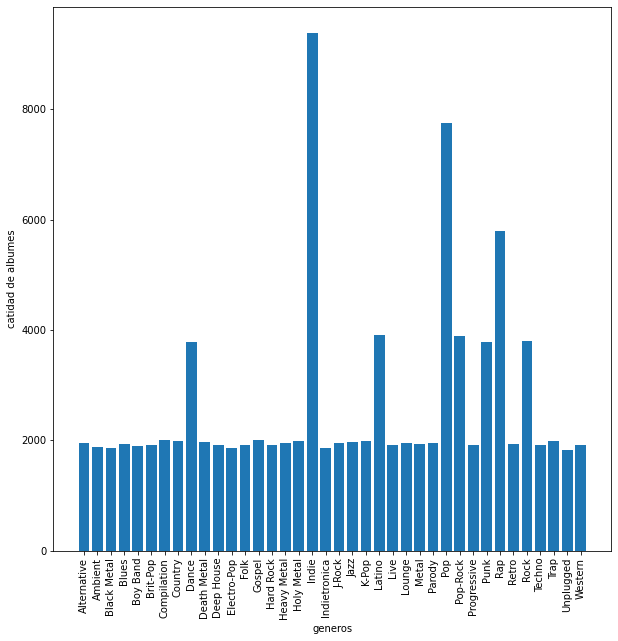

In [13]:
plt.figure(figsize=(10,10))
plt.bar(albums.groupby('genre')['genre'].count().index, albums.groupby('genre')['genre'].count())
plt.xticks(rotation='vertical')
plt.ylabel('catidad de albumes')
plt.xlabel('generos')
plt.show()

## Cantidad de albumes por genero
los 3 generos con mayor cantidad de albumes son indie, pop y rap

In [14]:
sales_x_genero = albums.groupby(by="genre")["sales"].sum()
sales_x_genero

genre
Alternative      947415937
Ambient          948095092
Black Metal      924992648
Blues            954110333
Boy Band         967144567
Brit-Pop         961891545
Compilation     1009992493
Country          976913380
Dance           1882029421
Death Metal      992830827
Deep House       946470811
Electro-Pop      920227112
Folk             965444874
Gospel          1005454870
Hard Rock        971337065
Heavy Metal     1001707668
Holy Metal       991769597
Indie           4699805459
Indietronica     909137345
J-Rock           993040263
Jazz             971138683
K-Pop            966169544
Latino          1953132011
Live             917567577
Lounge           978652545
Metal            983639223
Parody           966623545
Pop             3916637999
Pop-Rock        1939002474
Progressive      964075917
Punk            1914131397
Rap             2888914186
Retro            967534902
Rock            1899856670
Techno           960081079
Trap             975401621
Unplugged        92339

cantidad de ventas por genero

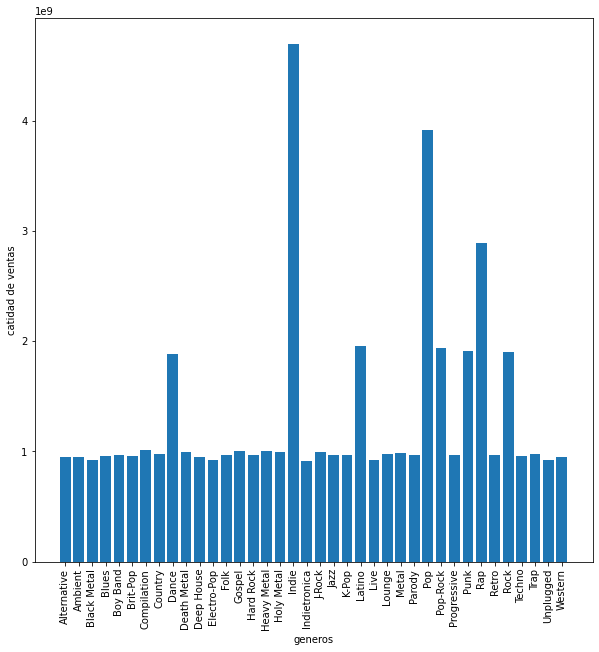

In [15]:
plt.figure(figsize=(10,10))
plt.bar(albums.groupby('genre').count().index, sales_x_genero)
plt.xticks(rotation='vertical')
plt.ylabel('catidad de ventas')
plt.xlabel('generos')
plt.show()

## Cantidad de ventas por genero
grafico de ventas por genero, expresado en billones, los generos con mas ventas son indie pop y rap

In [16]:
albums_x_año = albums.groupby(by="year_of_pub")["album_title"].count()
albums_x_año

year_of_pub
2000-01-01    4921
2001-01-01    4988
2002-01-01    5086
2003-01-01    4929
2004-01-01    5104
2005-01-01    4991
2006-01-01    4931
2007-01-01    5004
2008-01-01    4960
2009-01-01    4901
2010-01-01    5083
2011-01-01    4938
2012-01-01    4948
2013-01-01    5041
2014-01-01    5001
2015-01-01    4961
2016-01-01    4989
2017-01-01    5116
2018-01-01    4959
2019-01-01    5149
Name: album_title, dtype: int64

cantidad de albums por año

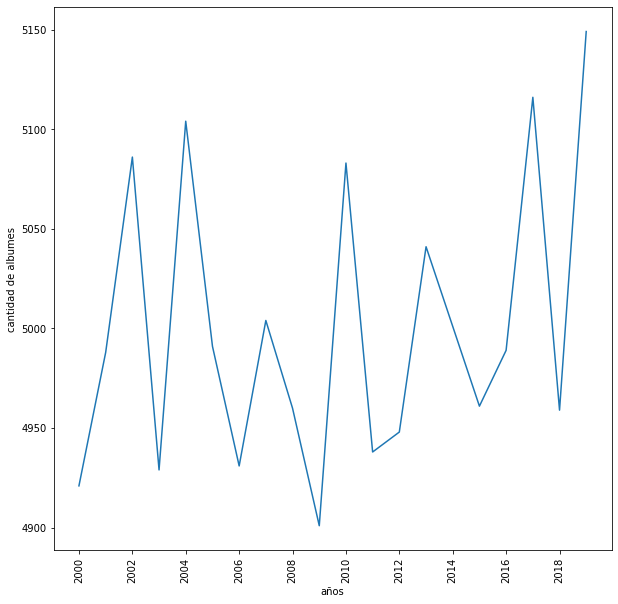

In [17]:
plt.figure(figsize=(10,10))
plt.plot(albums.groupby('year_of_pub').count().index, albums_x_año)
plt.xticks(rotation='vertical')
plt.ylabel('cantidad de albumes')
plt.xlabel('años')
plt.show()


## grafico de cantidad de albuemes por año
los 3 años con mas albumes fueron 2019, 2017 y 2004

In [18]:
sales_x_año =  albums.groupby(by="year_of_pub")["sales"].sum()
sales_x_año

year_of_pub
2000-01-01    2456431580
2001-01-01    2499382886
2002-01-01    2533250089
2003-01-01    2427413755
2004-01-01    2595892826
2005-01-01    2482510229
2006-01-01    2456680664
2007-01-01    2529523029
2008-01-01    2469141299
2009-01-01    2500929825
2010-01-01    2550894879
2011-01-01    2484782839
2012-01-01    2451167957
2013-01-01    2481986272
2014-01-01    2498543419
2015-01-01    2477205741
2016-01-01    2525597852
2017-01-01    2545009604
2018-01-01    2460080915
2019-01-01    2578046996
Name: sales, dtype: int64

cantidad de ventas por año

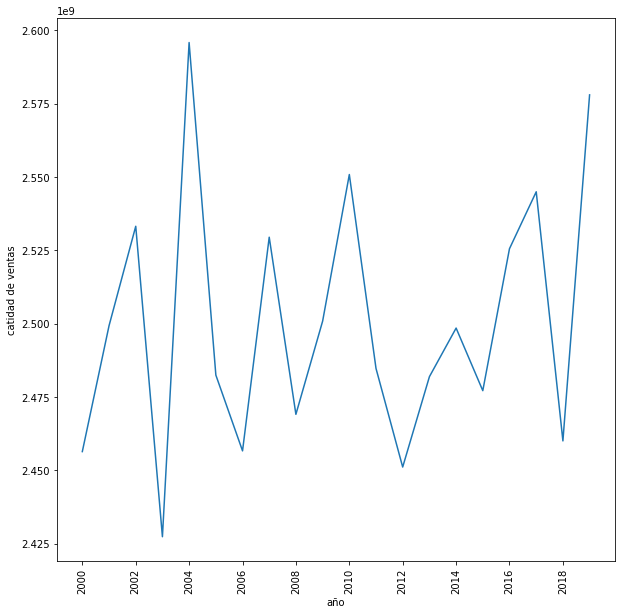

In [19]:
plt.figure(figsize=(10,10))
plt.plot(albums.groupby('year_of_pub').count().index, sales_x_año)
plt.xticks(rotation='vertical')
plt.ylabel('catidad de ventas')
plt.xlabel('año')
plt.show()

## grafico de ventas por año
los 3 años con mayores ventas fueron 2004, 2019 y 2010

In [20]:
albums['avg_critic'] = (albums['mtv_critic'] + albums['rolling_stone_critic'] + albums['music_maniac_critic']) / 3
avg_rating = albums.groupby(by="genre")["avg_critic"].mean()
avg_rating

genre
Alternative     2.756121
Ambient         2.725898
Black Metal     2.727778
Blues           2.766943
Boy Band        2.721137
Brit-Pop        2.732865
Compilation     2.758196
Country         2.768941
Dance           2.750861
Death Metal     2.747544
Deep House      2.791514
Electro-Pop     2.739443
Folk            2.751482
Gospel          2.751245
Hard Rock       2.766719
Heavy Metal     2.742874
Holy Metal      2.783308
Indie           2.744903
Indietronica    2.794133
J-Rock          2.736757
Jazz            2.769451
K-Pop           2.760070
Latino          2.742817
Live            2.784077
Lounge          2.726251
Metal           2.751206
Parody          2.752172
Pop             2.737223
Pop-Rock        2.765292
Progressive     2.744520
Punk            2.764545
Rap             2.751584
Retro           2.695426
Rock            2.749518
Techno          2.706283
Trap            2.762097
Unplugged       2.746765
Western         2.743490
Name: avg_critic, dtype: float64

creo una nueva columna de rating promedio entre los 3 criticos y luego creo la variable. Esto me servira para saber que generos tienen mejor rating que otros, independientemente de la cantidad de albumes o ventas que tengan

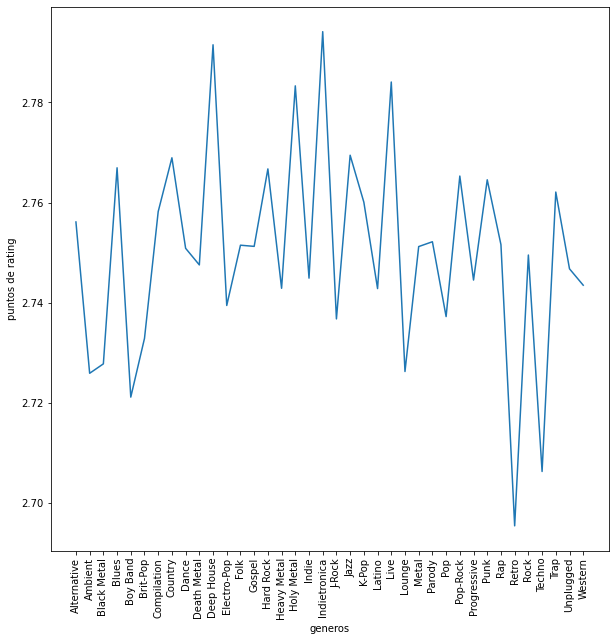

In [21]:
plt.figure(figsize=(10,10))
plt.plot(albums.groupby('genre').count().index, avg_rating)
plt.xticks(rotation='vertical')
plt.ylabel('puntos de rating')
plt.xlabel('generos')
plt.show()


In [22]:
from preprocess import success
albums["Exito"] = albums["sales"].apply(success)

Creo una nueva columna de exito para ver cuantos albumes son exitosos y cuantos no lo son, esta variable tambien me servira mas adelante para realizar el modelo

In [23]:
from preprocess import critic_success
albums["Rating"] = albums["avg_critic"].apply(critic_success)

Creo una nueva columna de Rating para ver cuantos albumes tuvieron buen rating y cuantos no, esta variable sera mi variable dependiente del modelo que realizare mas adelante

In [24]:
albums

,album_id,artist_id,album_title,genre,year_of_pub,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic,avg_critic,Exito,Rating
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006-01-01,11,905193,4.0,1.5,3.0,2.833333,Best seller,Average rating
1,2,23548,Down Mare,Metal,2014-01-01,7,969122,3.0,4.0,5.0,4.000000,Best seller,Great rating
2,3,17822,Embarrassed Hungry,Latino,2000-01-01,11,522095,2.5,1.0,2.0,1.833333,Great seller,Bad rating
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017-01-01,4,610116,1.5,2.0,4.0,2.500000,Great seller,Average rating
4,5,24941,Decent Distance Georgian,Black Metal,2010-01-01,8,151111,4.5,2.5,1.0,2.666667,Bad seller,Average rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016-01-01,3,871655,2.5,1.5,1.0,1.666667,Best seller,Bad rating
99996,99997,16345,Global,Retro,2013-01-01,14,146202,5.0,2.5,1.0,2.833333,Bad seller,Average rating
99997,99998,32674,MINI,Indie,2018-01-01,4,620452,2.0,4.0,5.0,3.666667,Great seller,Good rating
99998,99999,10134,Marketing Belligerent Toe,Pop,2007-01-01,7,643276,4.0,1.5,4.0,3.166667,Great seller,Good rating


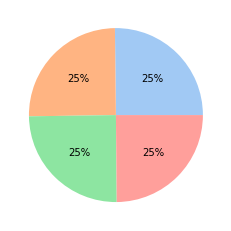

In [25]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(albums['Exito'].value_counts(), colors = colors, autopct='%.0f%%')


plt.show()

In [26]:
albums['Exito'].value_counts()

Good seller     25184
Great seller    25044
Best seller     24920
Bad seller      24852
Name: Exito, dtype: int64

## Grafico de torta de cantidadd de albumes mas vendidos
Hago un grafico de torta para ver como se distribuye el exito de los albumes en terminos de cantidad. Como se puede observar, hay una distribucion bastante pareja entre cada tipo de exito que tuvieron los albumes en cuanto a ventas, hay un 25% por cada tipo.

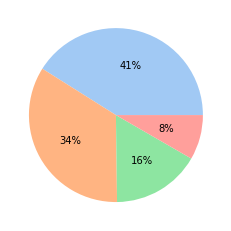

In [27]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(albums['Rating'].value_counts() ,colors = colors, autopct='%.0f%%')
plt.show()

In [28]:
albums['Rating'].value_counts()

Average rating    41053
Good rating       34155
Bad rating        16463
Great rating       8329
Name: Rating, dtype: int64

## Grafico de torta segun el rating de los albumes
Ahora hago un grafico de torta para ver como se distribuyen los ratings de los albumes, En este caso se puede observar una distribución mas variada, solo el 8% de los albumes tuvieron un rating muy bueno, mientras que el 41% tubo un rating promedio

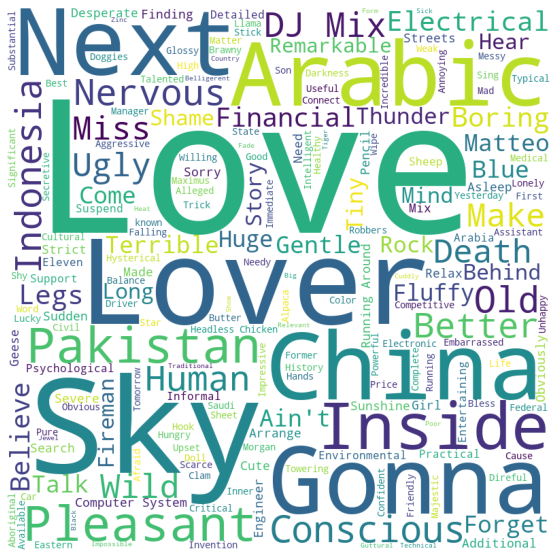

In [29]:
wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            min_font_size = 10).generate(' '.join(albums['album_title']))

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Wordcloud palabras mas usadas en titulos a desde 2000 hasta 2020
Realizo un grafico de nube para ver cuales fueron las palabras mas usadas en titulos de albumes, 'Love', 'Sky' y 'Next' son palabras bastante comunes, pero estas son palabras recurrentes contando todos los años, que pasa si filtro por determinados años, ¿seguiran siendo igualmente de comunes estas palabras? Vamos a comprobarlo

In [30]:
albums_date_old = albums[(albums['year_of_pub'] >= '2000-01-01') & (albums['year_of_pub'] <= '2010-01-01')]
albums_date_new = albums[(albums['year_of_pub'] >= '2011-01-01') & (albums['year_of_pub'] <= '2020-01-01')]

Creo 2 variables nuevas con las fechas mas viejas y las mas nuevas en las que se lanzaron los albums.

In [31]:
filtered_df_old = albums_date_old[['year_of_pub', 'album_title']]
filtered_df_new = albums_date_new[['year_of_pub', 'album_title']]

Creo 2 dataframes nuevos con los titulos de los albums en esas respectivas fechas para poder realizar la nuve de palabras

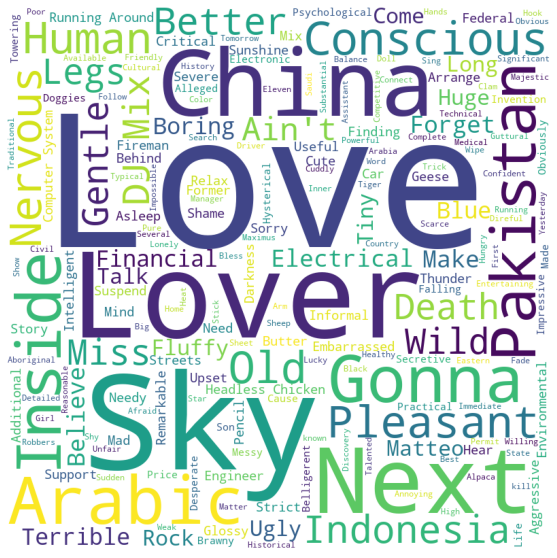

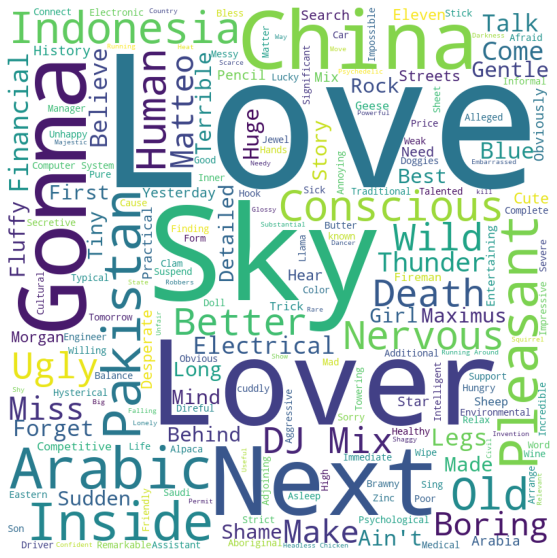

In [32]:
wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            min_font_size = 10).generate(' '.join(albums_date_old['album_title']))

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

wordcloud2 = WordCloud(width = 800, height = 800,
            background_color ='white',
            min_font_size = 10).generate(' '.join(albums_date_new['album_title']))

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## Wordcloud de palabras mas usadas en titulos desde el 2000 hasta el 2010 y desde el 2011 hasta el 2020
Como se puede observar son bastante similares las palabras utilizadas en los titulos a lo largo del tiempo, no parece haber demasiados cambios entre epocas.

# Preprocesamiento de datos


<AxesSubplot:>

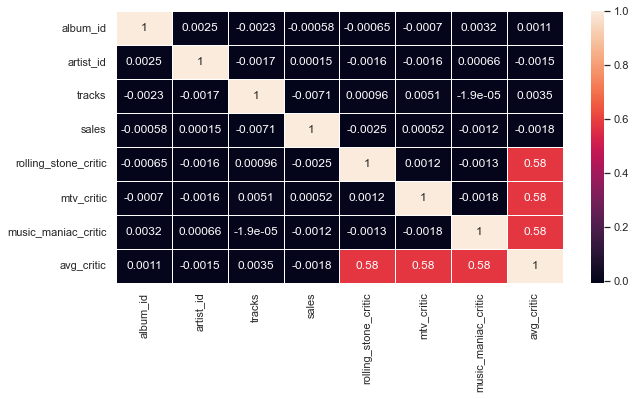

In [33]:
sns.set(rc={"figure.figsize":(10, 5)})
sns.heatmap(albums.corr(), annot=True, linewidths=1)

Hago un grafico de correlacion para empezar a analizar que variables me convendria utilizar para realizar el modelo, como se puede observar no hay practicamente relacion entre las variables, excepto las de rating con el rating promedio, ya que esta ultima es un promedio de los 3 tipos de rating.

In [34]:
albums.describe()

,album_id,artist_id,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic,avg_critic
count,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,24981.782050,8.48950,500044.72656,2.748945,2.751780,2.748225,2.749650
std,28867.657797,14450.407866,4.04511,288033.73321,1.435789,1.437516,1.434577,0.828534
min,1.000000,1.000000,2.00000,1009.00000,0.500000,0.500000,0.500000,0.500000
25%,25000.750000,12388.000000,5.00000,251603.50000,1.500000,1.500000,1.500000,2.166667
50%,50000.500000,24940.500000,8.00000,499531.50000,2.500000,3.000000,3.000000,2.833333
75%,75000.250000,37498.250000,12.00000,749354.25000,4.000000,4.000000,4.000000,3.333333
max,100000.000000,50000.000000,15.00000,999994.00000,5.000000,5.000000,5.000000,5.000000


In [35]:
numericas = albums.select_dtypes(exclude=['object']).columns
numericas

Index(['album_id', 'artist_id', 'year_of_pub', 'tracks', 'sales',
       'rolling_stone_critic', 'mtv_critic', 'music_maniac_critic',
       'avg_critic'],
      dtype='object')

Me fijo cuales son las variables numericas para realizar los graficos y los escalados correspondientes
## Escalado de variables numericas

<AxesSubplot:title={'center':'Boxplot desales'}, xlabel='sales'>

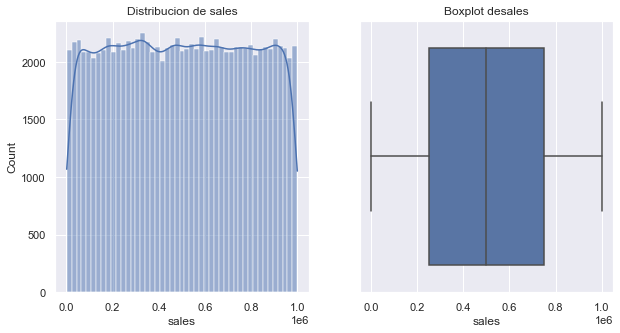

In [36]:
variable = 'sales'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = albums, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = albums, x = f"{variable}", ax=ax[1])

La variable 'Sales' no tiene outliers y tampoco tiene una distribución normal, por lo que me conviene hacer un escalado robusto

<AxesSubplot:title={'center':'Boxplot detracks'}, xlabel='tracks'>

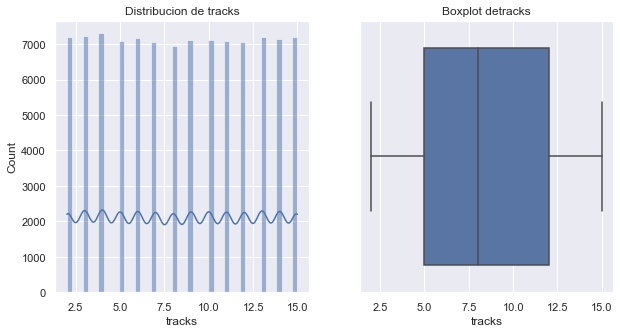

In [37]:
variable = 'tracks'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = albums, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = albums, x = f"{variable}", ax=ax[1])

La variable 'Tracks' tampoco tiene outliers ni tiene distribucion normal, entonces hago escalado robusto

<AxesSubplot:title={'center':'Boxplot demusic_maniac_critic'}, xlabel='music_maniac_critic'>

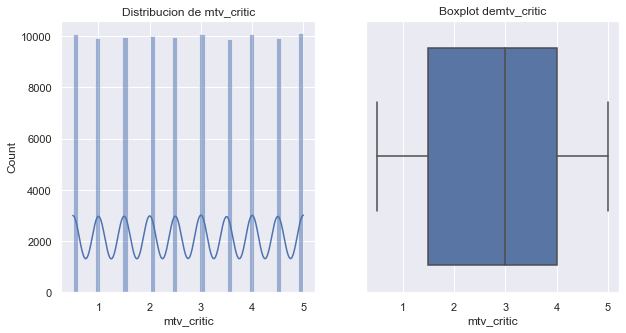

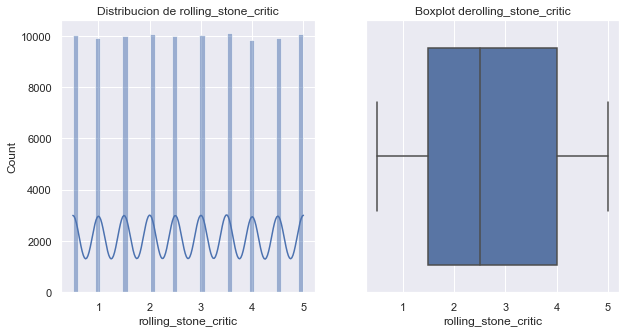

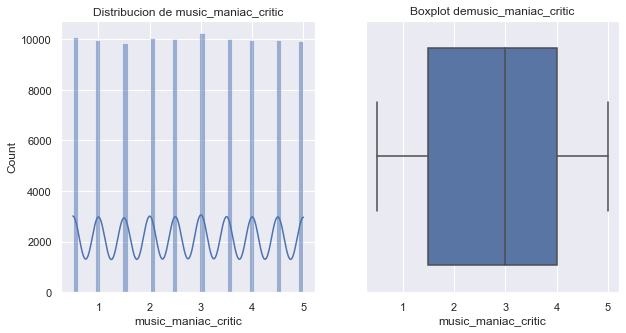

In [38]:
variable = 'mtv_critic'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = albums, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = albums, x = f"{variable}", ax=ax[1])

variable2 = 'rolling_stone_critic'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable2}")
sns.histplot(data = albums, x = f"{variable2}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable2}")
sns.boxplot(data = albums, x = f"{variable2}", ax=ax[1])

variable3 = 'music_maniac_critic'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable3}")
sns.histplot(data = albums, x = f"{variable3}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable3}")
sns.boxplot(data = albums, x = f"{variable3}", ax=ax[1])

Los 3 tipos de criticas tampoco tienen outliers ni distribucion normal, entonces hago escalado robusto

<AxesSubplot:title={'center':'Boxplot deavg_critic'}, xlabel='avg_critic'>

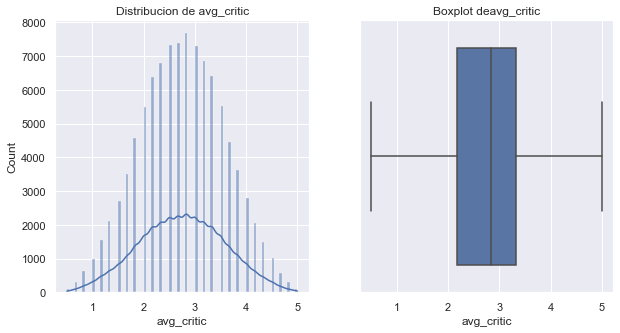

In [39]:
variable = 'avg_critic'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = albums, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = albums, x = f"{variable}", ax=ax[1])

Las criticas promedio tampoco tienen outliers pero si tienen una distribucion normal, por lo que hago escalado con el minmaxscaler

In [40]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
albums['sales'],albums['tracks'],albums['rolling_stone_critic'], albums['mtv_critic'], albums['music_maniac_critic'] = rb_scaler.fit_transform(albums[['sales','tracks','rolling_stone_critic', 'mtv_critic', 'music_maniac_critic']]).T

albums

,album_id,artist_id,album_title,genre,year_of_pub,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic,avg_critic,Exito,Rating
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006-01-01,0.428571,0.814989,0.6,-0.6,0.0,2.833333,Best seller,Average rating
1,2,23548,Down Mare,Metal,2014-01-01,-0.142857,0.943425,0.2,0.4,0.8,4.000000,Best seller,Great rating
2,3,17822,Embarrassed Hungry,Latino,2000-01-01,0.428571,0.045331,0.0,-0.8,-0.4,1.833333,Great seller,Bad rating
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017-01-01,-0.571429,0.222168,-0.4,-0.4,0.4,2.500000,Great seller,Average rating
4,5,24941,Decent Distance Georgian,Black Metal,2010-01-01,0.000000,-0.699990,0.8,-0.2,-0.8,2.666667,Bad seller,Average rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016-01-01,-0.714286,0.747610,0.0,-0.6,-0.8,1.666667,Best seller,Bad rating
99996,99997,16345,Global,Retro,2013-01-01,0.857143,-0.709852,1.0,-0.2,-0.8,2.833333,Bad seller,Average rating
99997,99998,32674,MINI,Indie,2018-01-01,-0.571429,0.242934,-0.2,0.4,0.8,3.666667,Great seller,Good rating
99998,99999,10134,Marketing Belligerent Toe,Pop,2007-01-01,-0.142857,0.288788,0.6,-0.6,0.4,3.166667,Great seller,Good rating


Procedo a realizar el escalado robusto de las variables numericas de interes

In [41]:
from sklearn.preprocessing import MinMaxScaler

mnx_scaler = MinMaxScaler()

albums['avg_critic'] = mnx_scaler.fit_transform(albums[['avg_critic']])

albums

,album_id,artist_id,album_title,genre,year_of_pub,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic,avg_critic,Exito,Rating
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006-01-01,0.428571,0.814989,0.6,-0.6,0.0,0.518519,Best seller,Average rating
1,2,23548,Down Mare,Metal,2014-01-01,-0.142857,0.943425,0.2,0.4,0.8,0.777778,Best seller,Great rating
2,3,17822,Embarrassed Hungry,Latino,2000-01-01,0.428571,0.045331,0.0,-0.8,-0.4,0.296296,Great seller,Bad rating
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017-01-01,-0.571429,0.222168,-0.4,-0.4,0.4,0.444444,Great seller,Average rating
4,5,24941,Decent Distance Georgian,Black Metal,2010-01-01,0.000000,-0.699990,0.8,-0.2,-0.8,0.481481,Bad seller,Average rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016-01-01,-0.714286,0.747610,0.0,-0.6,-0.8,0.259259,Best seller,Bad rating
99996,99997,16345,Global,Retro,2013-01-01,0.857143,-0.709852,1.0,-0.2,-0.8,0.518519,Bad seller,Average rating
99997,99998,32674,MINI,Indie,2018-01-01,-0.571429,0.242934,-0.2,0.4,0.8,0.703704,Great seller,Good rating
99998,99999,10134,Marketing Belligerent Toe,Pop,2007-01-01,-0.142857,0.288788,0.6,-0.6,0.4,0.592593,Great seller,Good rating


Procedo a realizar el escalado de 'avg_critic', para esta no utilice el escalado robusto ya que cuenta con distribucion normal y no tiene outliers

# Encoding de variables categoricas

In [42]:
albums['Exito'].unique()

array(['Best seller', 'Great seller', 'Bad seller', 'Good seller'],
      dtype=object)

In [43]:
albums['Rating'].unique()

array(['Average rating', 'Great rating', 'Bad rating', 'Good rating'],
      dtype=object)

Me fijo los valores unicos de las variables categoricas para realizar el encoding de las variables de interes que considere necesarias.

In [44]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Best seller', 'Great seller', 'Good seller', 'Bad seller']])
albums['Exito'] = oe.fit_transform(albums[['Exito']])
albums

,album_id,artist_id,album_title,genre,year_of_pub,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic,avg_critic,Exito,Rating
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006-01-01,0.428571,0.814989,0.6,-0.6,0.0,0.518519,0.0,Average rating
1,2,23548,Down Mare,Metal,2014-01-01,-0.142857,0.943425,0.2,0.4,0.8,0.777778,0.0,Great rating
2,3,17822,Embarrassed Hungry,Latino,2000-01-01,0.428571,0.045331,0.0,-0.8,-0.4,0.296296,1.0,Bad rating
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017-01-01,-0.571429,0.222168,-0.4,-0.4,0.4,0.444444,1.0,Average rating
4,5,24941,Decent Distance Georgian,Black Metal,2010-01-01,0.000000,-0.699990,0.8,-0.2,-0.8,0.481481,3.0,Average rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016-01-01,-0.714286,0.747610,0.0,-0.6,-0.8,0.259259,0.0,Bad rating
99996,99997,16345,Global,Retro,2013-01-01,0.857143,-0.709852,1.0,-0.2,-0.8,0.518519,3.0,Average rating
99997,99998,32674,MINI,Indie,2018-01-01,-0.571429,0.242934,-0.2,0.4,0.8,0.703704,1.0,Good rating
99998,99999,10134,Marketing Belligerent Toe,Pop,2007-01-01,-0.142857,0.288788,0.6,-0.6,0.4,0.592593,1.0,Good rating


Utilizo el OrdinalEncoder para realizar el encoding de la variable 'Exito' ya que aunque es una variable multicategorica, es una variable ordenada, por lo que me conviene usar este encoder ya que el OneHotEncoder no distingue por orden, y este orden es importante porque se relacionado con la variable target

In [45]:
oe = OrdinalEncoder(categories=[['Great rating', 'Good rating', 'Average rating', 'Bad rating']])
albums['Rating'] = oe.fit_transform(albums[['Rating']])
albums

,album_id,artist_id,album_title,genre,year_of_pub,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic,avg_critic,Exito,Rating
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006-01-01,0.428571,0.814989,0.6,-0.6,0.0,0.518519,0.0,2.0
1,2,23548,Down Mare,Metal,2014-01-01,-0.142857,0.943425,0.2,0.4,0.8,0.777778,0.0,0.0
2,3,17822,Embarrassed Hungry,Latino,2000-01-01,0.428571,0.045331,0.0,-0.8,-0.4,0.296296,1.0,3.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017-01-01,-0.571429,0.222168,-0.4,-0.4,0.4,0.444444,1.0,2.0
4,5,24941,Decent Distance Georgian,Black Metal,2010-01-01,0.000000,-0.699990,0.8,-0.2,-0.8,0.481481,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016-01-01,-0.714286,0.747610,0.0,-0.6,-0.8,0.259259,0.0,3.0
99996,99997,16345,Global,Retro,2013-01-01,0.857143,-0.709852,1.0,-0.2,-0.8,0.518519,3.0,2.0
99997,99998,32674,MINI,Indie,2018-01-01,-0.571429,0.242934,-0.2,0.4,0.8,0.703704,1.0,1.0
99998,99999,10134,Marketing Belligerent Toe,Pop,2007-01-01,-0.142857,0.288788,0.6,-0.6,0.4,0.592593,1.0,1.0


Lo mismo con la variable 'Rating', aunque sea multicategorica, esta ordenada, por lo que me conviene usar el OrdinalEncoder

In [46]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(albums[['genre']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
genre_encoded = ohe.transform(albums[['genre']])

albums[ohe.get_feature_names_out()] = genre_encoded
albums

[array(['Alternative', 'Ambient', 'Black Metal', 'Blues', 'Boy Band',
        'Brit-Pop', 'Compilation', 'Country', 'Dance', 'Death Metal',
        'Deep House', 'Electro-Pop', 'Folk', 'Gospel', 'Hard Rock',
        'Heavy Metal', 'Holy Metal', 'Indie', 'Indietronica', 'J-Rock',
        'Jazz', 'K-Pop', 'Latino', 'Live', 'Lounge', 'Metal', 'Parody',
        'Pop', 'Pop-Rock', 'Progressive', 'Punk', 'Rap', 'Retro', 'Rock',
        'Techno', 'Trap', 'Unplugged', 'Western'], dtype=object)]

array(['genre_Alternative', 'genre_Ambient', 'genre_Black Metal',
       'genre_Blues', 'genre_Boy Band', 'genre_Brit-Pop',
       'genre_Compilation', 'genre_Country', 'genre_Dance',
       'genre_Death Metal', 'genre_Deep House', 'genre_Electro-Pop',
       'genre_Folk', 'genre_Gospel', 'genre_Hard Rock',
       'genre_Heavy Metal', 'genre_Holy Metal', 'genre_Indie',
       'genre_Indietronica', 'genre_J-Rock', 'genre_Jazz', 'genre_K-Pop',
       'genre_Latino', 'genre_Live', 'genre_Lounge', 'genre_Metal',
       'genre_Parody', 'genre_Pop', 'genre_Pop-Rock', 'genre_Progressive',
       'genre_Punk', 'genre_Rap', 'genre_Retro', 'genre_Rock',
       'genre_Techno', 'genre_Trap', 'genre_Unplugged', 'genre_Western'],
      dtype=object)

,album_id,artist_id,album_title,genre,year_of_pub,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic,...,genre_Pop-Rock,genre_Progressive,genre_Punk,genre_Rap,genre_Retro,genre_Rock,genre_Techno,genre_Trap,genre_Unplugged,genre_Western
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006-01-01,0.428571,0.814989,0.6,-0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,23548,Down Mare,Metal,2014-01-01,-0.142857,0.943425,0.2,0.4,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,17822,Embarrassed Hungry,Latino,2000-01-01,0.428571,0.045331,0.0,-0.8,-0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017-01-01,-0.571429,0.222168,-0.4,-0.4,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,24941,Decent Distance Georgian,Black Metal,2010-01-01,0.000000,-0.699990,0.8,-0.2,-0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016-01-01,-0.714286,0.747610,0.0,-0.6,-0.8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,99997,16345,Global,Retro,2013-01-01,0.857143,-0.709852,1.0,-0.2,-0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,99998,32674,MINI,Indie,2018-01-01,-0.571429,0.242934,-0.2,0.4,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,99999,10134,Marketing Belligerent Toe,Pop,2007-01-01,-0.142857,0.288788,0.6,-0.6,0.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


La variable 'genre' es multicategorica y no esta ordenada, por lo que utilizo el OneHotEncoder, aunque me alarga mucho las columnas del dataset y esto puede resultar problematico, vamos a ver como evoluciona mas adelante y si es necesario se realizara otro tipo de encoding.

Decidi no hacer encoding de la variable 'album_title' ya que no me parece relevante para el modelo que estoy realizanod, por lo que la omitire ma adelante

# Creacion del modelo
En esta seccion vamos a ver que modelo me parece mas conveniente realizar, primero voy a tratr de relizar un modelo que pueda predecir las ventas en funcion de las demas variables. Este modelo si es exitoso me permitira saber si un album tendra buenas ventas antes de ser lanzado o no. Decidi omitir la variable de 'album_title' ya que no me parece relevante, tambien la de 'year_of_pub', la de 'sales', porque es la variable que quiero predecir, la de 'genre' porque ya realice el encoding y se dividio en otras columnas, y la de 'Exito', porque esta claramente relacionada con las sales, no tendria sentido utilizarla porque ya sabria el resultado y justamente lo que tratamos es de predecirlo

In [47]:
from sklearn.model_selection import cross_val_score
X = albums.drop(columns=['album_title', 'year_of_pub', 'sales', 'Exito', 'genre'])
y = albums['sales']

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5)
base_model_score = scores.mean()

base_model_score

-0.000673275567434617

Como se puede observar el puntaje del modelo es demasiado bajo por lo que ninguna de las variables utilizadas nos sirven para predecir las ventas. Vamos a ver cuales son las de menor y mayor importancia asi por lo menos puedo tratar de aumentar la puntuacion eliminando las variables con baja importancia

In [48]:
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance

model = LinearRegression()
cv_results = cross_validate(model, X, y, cv = 5)
score = cv_results["test_score"].mean()
print(f"Antes de la permutacion, el score del model es: {round(score,2)}")


model = LinearRegression().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

Antes de la permutacion, el score del model es: -0.0
Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
6,avg_critic,27419778583434.453125
4,mtv_critic,9174757614175.095703
3,rolling_stone_critic,9150709510536.070312
5,music_maniac_critic,9133997641032.267578
25,genre_Indie,2455593822704.387695
35,genre_Pop,2066365727958.614746
39,genre_Rap,1575498301138.109131
30,genre_Latino,1082010786558.039429
36,genre_Pop-Rock,1076759110456.13623
41,genre_Rock,1056682555212.536865


Como se puede observar las nuevas vaiables encodeadas de la columna 'genre' estan dando resultados incomodos, a lo mejor es un problema del tipo de encoding que utilice, vamos a probar de hacer otro encoding para tratar de solucionar el problema

In [49]:
len(albums.columns)

51

In [50]:
albums = albums.drop(albums.iloc[:, 13:51],axis = 1)
albums

,album_id,artist_id,album_title,genre,year_of_pub,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic,avg_critic,Exito,Rating
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006-01-01,0.428571,0.814989,0.6,-0.6,0.0,0.518519,0.0,2.0
1,2,23548,Down Mare,Metal,2014-01-01,-0.142857,0.943425,0.2,0.4,0.8,0.777778,0.0,0.0
2,3,17822,Embarrassed Hungry,Latino,2000-01-01,0.428571,0.045331,0.0,-0.8,-0.4,0.296296,1.0,3.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017-01-01,-0.571429,0.222168,-0.4,-0.4,0.4,0.444444,1.0,2.0
4,5,24941,Decent Distance Georgian,Black Metal,2010-01-01,0.000000,-0.699990,0.8,-0.2,-0.8,0.481481,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,Pop-Rock,2016-01-01,-0.714286,0.747610,0.0,-0.6,-0.8,0.259259,0.0,3.0
99996,99997,16345,Global,Retro,2013-01-01,0.857143,-0.709852,1.0,-0.2,-0.8,0.518519,3.0,2.0
99997,99998,32674,MINI,Indie,2018-01-01,-0.571429,0.242934,-0.2,0.4,0.8,0.703704,1.0,1.0
99998,99999,10134,Marketing Belligerent Toe,Pop,2007-01-01,-0.142857,0.288788,0.6,-0.6,0.4,0.592593,1.0,1.0


Elimino las columnas creadas a partir de la variable 'genre' para poder realizar el encoding nuevamente

In [51]:
albums['genre'] = LabelEncoder().fit_transform(albums['genre'])
albums

,album_id,artist_id,album_title,genre,year_of_pub,tracks,sales,rolling_stone_critic,mtv_critic,music_maniac_critic,avg_critic,Exito,Rating
0,1,1767,Call me Cat Moneyless That Doggies,12,2006-01-01,0.428571,0.814989,0.6,-0.6,0.0,0.518519,0.0,2.0
1,2,23548,Down Mare,25,2014-01-01,-0.142857,0.943425,0.2,0.4,0.8,0.777778,0.0,0.0
2,3,17822,Embarrassed Hungry,22,2000-01-01,0.428571,0.045331,0.0,-0.8,-0.4,0.296296,1.0,3.0
3,4,19565,Standard Immediate Engineer Slovakia,27,2017-01-01,-0.571429,0.222168,-0.4,-0.4,0.4,0.444444,1.0,2.0
4,5,24941,Decent Distance Georgian,2,2010-01-01,0.000000,-0.699990,0.8,-0.2,-0.8,0.481481,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,44624,Mike Pies Malay Albanian Terrible,28,2016-01-01,-0.714286,0.747610,0.0,-0.6,-0.8,0.259259,0.0,3.0
99996,99997,16345,Global,32,2013-01-01,0.857143,-0.709852,1.0,-0.2,-0.8,0.518519,3.0,2.0
99997,99998,32674,MINI,17,2018-01-01,-0.571429,0.242934,-0.2,0.4,0.8,0.703704,1.0,1.0
99998,99999,10134,Marketing Belligerent Toe,27,2007-01-01,-0.142857,0.288788,0.6,-0.6,0.4,0.592593,1.0,1.0


Utilizo el LabelEncoder para ver si ahora se soluciona el problema y puedo utilizar la variable 'genre' de manera correcta para el modelo, sin embargo el modelo de regresion lineal para predecir las sales tenia un puntaje demasiado bajo, vamos a tratar de crear otro modelo que tenga un mejor score.

In [52]:
X = albums.drop(columns=['Rating', 'album_title', 'year_of_pub', 'avg_critic', 'rolling_stone_critic', 'mtv_critic', 'music_maniac_critic'])
y = albums['Rating']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=5)
base_model_score = scores.mean()

base_model_score

0.41052999999999995

Decidi cambiar de modelo y crear uno que me permita predecir el tipo de rating que tendra un album, para eso anteriormente creamos la variable de 'Rating'. El modelo que hice ahora es uno de regresion logistica ya que la varible target es una variable categorica y para poder predecirla tambien voy a utilizar otras variables que son de tipo categorias como la de 'Exito'
Ahora gracias al cross validation que hicimos podemos ver que el puntaje del nuevo modelo que realizamos es mas alto, vamos a proceder a identificar y eliminar las variables de menor importancia para ver si podemos seguir aumentando el score

In [53]:
model = LogisticRegression()
cv_results = cross_validate(model, X, y, cv = 5)
score = cv_results["test_score"].mean()
print(f"Antes de la permutacion, el score del model es: {round(score,2)}")


model = LinearRegression().fit(X,y)
permutation_score = permutation_importance(model, X, y, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T,
                            columns = ['feature','feature_importance'])

print("Despues de la permutacion de variables, asi decrece el score en terminos de variables:")
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df

Antes de la permutacion, el score del model es: 0.41
Despues de la permutacion de variables, asi decrece el score en terminos de variables:


,feature,feature_importance
4,sales,0.000294
5,Exito,0.000258
1,artist_id,0.000009
2,genre,0.000003
3,tracks,0.000002
0,album_id,0.000001


Como se puede observar, todas las variables tiene relativamente poca importancia, pero las que menos impotancia tiene son las de 'album_id', 'genre', 'tracks' y 'artist_id'. Asi que vamos a proceder a eliminar las que crea que sean necesarias para aumentar el puntaje del modelo

In [54]:
X_strong_features = albums.drop(columns=['Rating'] + ['album_title'] + ['year_of_pub'] + ['avg_critic'] + ['rolling_stone_critic'] + ['mtv_critic'] + ['music_maniac_critic'] + ['genre'] + ['tracks'] + ['album_id'] + ['artist_id'])

print(f"Las variables fuertes son {list(X_strong_features.columns)}")

model = LogisticRegression()

scores = cross_val_score(model, X_strong_features, y, cv = 5)
strong_model_score = scores.mean()
print(f"Antes de remover las variables el Accurracy es {round(score,2)}")

print(f"El modelo entrenado con las variables fuertes dan un accuracy de {round(strong_model_score,2)}")

Las variables fuertes son ['sales', 'Exito']
Antes de remover las variables el Accurracy es 0.41
El modelo entrenado con las variables fuertes dan un accuracy de 0.41


Luego de eliminar la mayoria de variables debiles, el score no aumenta, por lo que vamos a dejarlo asi, ya que eliminar las variables mas fuertes ocasionara que se reduzca el puntaje, y no queremos eso

In [55]:
X = albums.drop(columns=['Rating'] + ['album_title'] + ['year_of_pub'] + ['avg_critic'] + ['rolling_stone_critic'] + ['mtv_critic'] + ['music_maniac_critic'] + ['genre']  + ['album_id'] + ['artist_id'])

Vamos a eliminar la mayor cantidad de variables debilies de nuestra X ya que no son necesarias porque el puntaje del modelo sigue siendo el mismo

In [56]:
reg = LogisticRegression().fit(X,y)

In [57]:
reg.coef_

array([[-0.00453727, -0.02086495, -0.00820315],
       [ 0.0077978 , -0.02727044, -0.01708648],
       [-0.00613518,  0.02381691,  0.0221167 ],
       [ 0.00287465,  0.02431847,  0.00317293]])

Estos son los coeficientes de nuestro modelo de regresion, el coeficiente se encarga predecir que tan aceratdos seran los resultados del modelo, principalmente se encarga de predecir futuros resultados y comprobar la hipotesis del modelo. Como podemos observar, varios de los coeficientes son negativos, esto significa que si la variable que predice decrece, entonces el resultado que queremos que ocurra tambien lo hara. En cambio, los coeficientes que son positivos hacen que haya mas prbabilidades de que el resultado esperado ocurra, aunque en este caso los numeros son muy pequeños, por lo que no tienen gran significancia

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=1)

Vamos a entrar al modelo para poder realizar mas pruebas de precision, como por ejemplo la matriz de confusion. Para eso, divido mis variables en 2 datasets nuevos, uno de entrenamiento y otro de testeo. Lo realizo utilizando el train test split. El tamaño recomendado del test es entre 20 y 30 % asi que en este caso utilizaremos 30 para el test y 70 para el train

## Matriz de confusion

In [59]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [60]:
knn.score(X_test, y_test)

0.3597666666666667

In [61]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[  87, 1090, 1227,   99],
       [ 305, 4442, 4997,  440],
       [ 398, 5451, 6018,  501],
       [ 144, 2193, 2362,  246]], dtype=int64)

Creo una matriz de confusion para ver que tan preciso en mi modelo. Como podemos observar el modelo es bastante impreciso, sobre todo para los rating mas bajos y mas altos, los que estan en el medio que serian el rating mediocre y el rating bueno, parece predecirlos mucho mejor que los demas tipos de rating por alguna razon

D:\pycharm\pythonProject\Martin_Alegre_Ucema\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


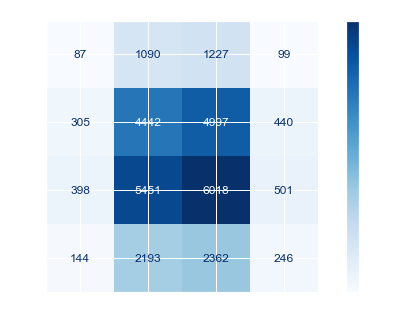

In [62]:
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

Hago un grafico de la matriz de confusion para tener una mejor visualizacion

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.09      0.03      0.05      2503
         1.0       0.34      0.44      0.38     10184
         2.0       0.41      0.49      0.45     12368
         3.0       0.19      0.05      0.08      4945

    accuracy                           0.36     30000
   macro avg       0.26      0.25      0.24     30000
weighted avg       0.32      0.36      0.33     30000



## Accuracy

In [64]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3597666666666667

Otra de las herramientas que puedo utilizar para ver la precision de mi modelo es el accuracy. Este lo que hace es sumar los verdaderos positivos y negativos de la matriz de confusion y dividirlos por el total.
Como podemos ver el score es incluso menor todavia

## Recall

In [65]:
recall = recall_score(y_test, y_pred, average='micro')
recall

0.3597666666666667

Otra de las herramientas que puedo utilizar para ver la precision de mi modelo es el recall. Este lo que hace es dividir los verdaderos positivos entre la sumatoria de los falsos negativos y los verdaderos positivos de la matriz de confusion. Por alguna razon me da el mismo score que el accuracy

## Precision

In [66]:
precision = precision_score(y_test, y_pred, average='micro')
precision

0.3597666666666667

Otra de las herramientas que puedo utilizar para ver la precision de mi modelo es la "precision" valga la redundancia. Este lo que hace es dividir los verdaderos positivos entre la sumatoria de los falsos positivos y los verdaderos positivos de la matriz de confusion. Me sigue dando la misma puntuacion que los otras dos metricas de precision.


## Predicciones

In [67]:
model.fit(X, y)
Xnew, _ = make_regression(n_samples=3, n_features=3, noise=0.1, random_state=1)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
 print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.07296862 -2.3015387   0.86540763], Predicted=2.0
X=[ 1.74481176  0.3190391  -0.7612069 ], Predicted=2.0
X=[ 1.62434536 -0.52817175 -0.61175641], Predicted=2.0


D:\pycharm\pythonProject\Martin_Alegre_Ucema\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [68]:
model.fit(X, y)
Xnew, _ = make_regression(n_samples=3, n_features=3, noise=0.1, random_state=2)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
 print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-0.84174737  1.64027081 -1.79343559], Predicted=2.0
X=[-2.1361961  -0.41675785 -0.05626683], Predicted=2.0
X=[-1.05795222  0.50288142 -1.24528809], Predicted=2.0


D:\pycharm\pythonProject\Martin_Alegre_Ucema\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
model.fit(X, y)
Xnew, _ = make_regression(n_samples=3, n_features=3, noise=0.1, random_state=3)
ynew = model.predict(Xnew)
for i in range(len(Xnew)):
 print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[0.43650985 0.09649747 1.78862847], Predicted=2.0
X=[-0.2773882  -0.35475898 -1.8634927 ], Predicted=2.0
X=[-0.62700068 -0.04381817 -0.08274148], Predicted=2.0


D:\pycharm\pythonProject\Martin_Alegre_Ucema\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Realizo 3 predicciones distintas para ver como se comporta mi modelo ante disintos escenarios random para ver si puede predecir bien los resultados. Como se puede observar el modelo efectivamente es bastante impreciso, por alguna razon siempre predice 2. A lo mejor esto puede darse por la manera en la que estan escalados los datos o por el dataset en si.

## Conclusiones

Si bien el modelo original arrojaba una precision del 41% el modelo es bastante impreciso, la hipotesis efectivamente no se cumple ya que parece ser que el resultado parece ser siempre bastante similar por lo que no queda muy claro si verdaderamente las variables predictoras, que en este caso son 'tracks', 'sales' y 'Exito' ´pueden predecir con exactitud si un album va a tener malas, mediocre, buenas o geniales criticas